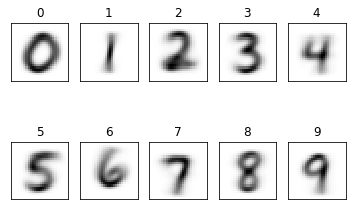

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys, ast

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

train_data = data[0:6000]
test_data = data[6000:10000]


size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image_train   = len(train_data)
num_image_test    = len(test_data)



count1     = 0     # count for the number of images
count2     = 0

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image_train  = np.empty((size_row * size_col, num_image_train), dtype=float)
list_label_train  = np.empty(num_image_train, dtype=int)


list_image_test  = np.empty((size_row*size_col,num_image_test),dtype=float)
list_label_test  = np.empty(num_image_test,dtype=int)

for line1 in train_data:

    line_data   = line1.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    len(label)

    list_label_train[count1]       = label
    list_image_train[:, count1]    = im_vector

    count1 += 1

    
    

for line2 in test_data:

    line_data   = line2.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count2]       = label
    list_image_test[:, count2]    = im_vector

    count2 += 1

    
    
#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
########################################

 Plot the loss curve